In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [34]:
df = pd.read_csv('train.csv')
pd.reset_option('display.max_columns', None)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [24]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [70]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [26]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [27]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [28]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [40]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

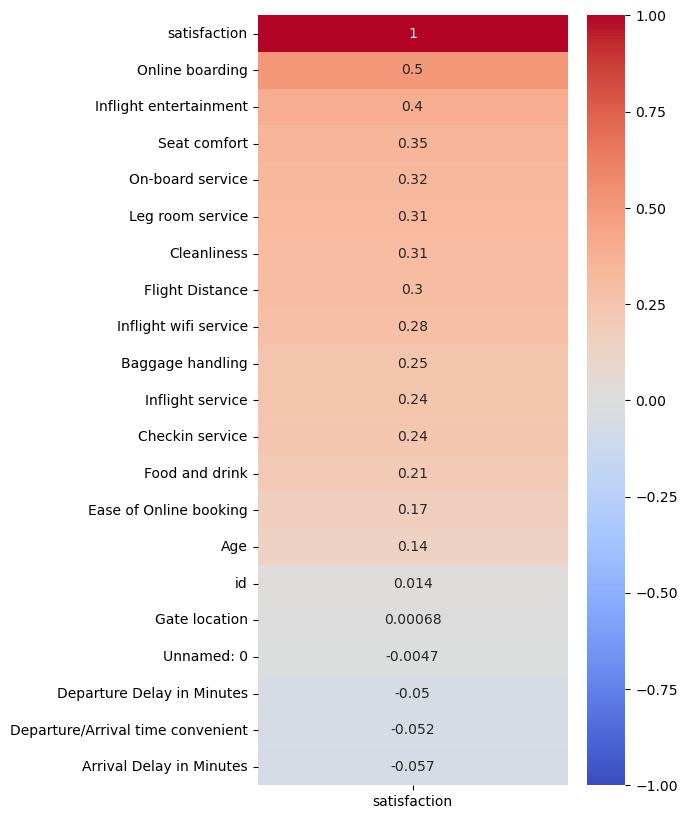

In [30]:
plt.figure(figsize = (5, 10))
sns.heatmap(df.corr(numeric_only = True)[['satisfaction']].sort_values(by = 'satisfaction', ascending = False),
            vmax = 1,
            vmin = -1,
            cmap = 'coolwarm',
            annot = True);

In [43]:
# These columns were not relevant for our analysis

df = df.drop(columns = ['Unnamed: 0', 'id', 'Gate location'])

In [44]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfaction                           int64
dtype: obj

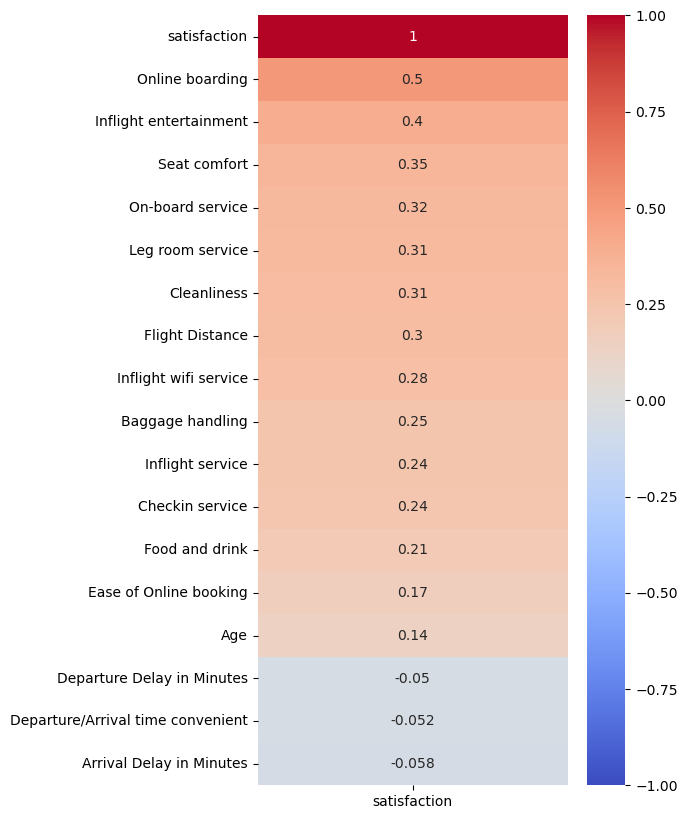

In [45]:
plt.figure(figsize = (5, 10))
sns.heatmap(df.corr(numeric_only = True)[['satisfaction']].sort_values(by = 'satisfaction', ascending = False),
            vmax = 1,
            vmin = -1,
            cmap = 'coolwarm',
            annot = True);

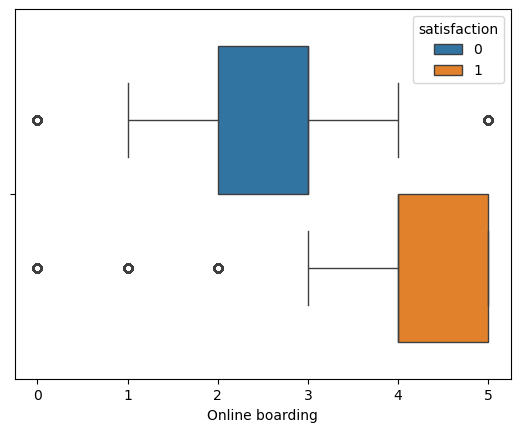

In [46]:
sns.boxplot(df,
            x = 'Online boarding',
            hue = 'satisfaction'
           );         

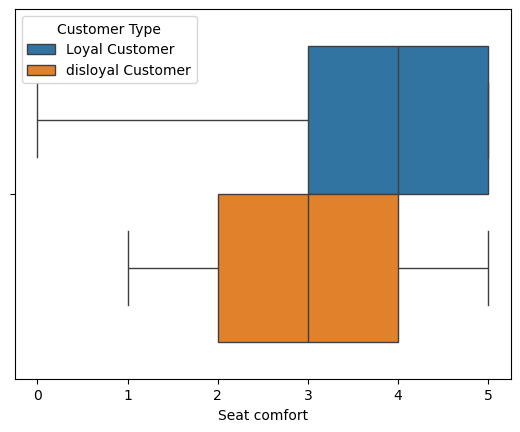

In [55]:
sns.boxplot(df,
            x = 'Seat comfort',
            hue = 'Customer Type'
            );

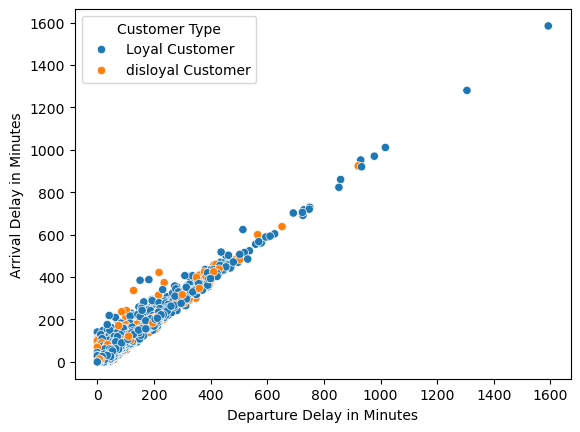

In [62]:
sns.scatterplot(df,
                x = 'Departure Delay in Minutes',
                y = 'Arrival Delay in Minutes',
                hue = 'Customer Type'
               );

In [67]:
df['satisfaction'] = df['satisfaction'].map({0 : 'neutral or dissatisfied', 1 : 'satisfied' })

In [71]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [75]:
X = df.drop(columns = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class'])
y = df['satisfaction']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [78]:
# Standardizing the features for KNN model
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [80]:
# Figuring out ideal value of k
scores = []

for k in range(3, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)

    scores.append({'k': k, 'train_score': train_score, 'test_score': test_score})

df_score = pd.DataFrame(scores)

In [81]:
df_score

,k,train_score,test_score
0,3,0.950685,0.910340
1,5,0.938982,0.912727
2,7,0.932874,0.912304
3,9,0.928742,0.911187
4,11,0.925213,0.911803
5,13,0.923224,0.910725
6,15,0.921877,0.909955
7,17,0.920337,0.909031
8,19,0.919220,0.908800


In [83]:
df['satisfaction'].value_counts(normalize = True)

satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64

In [84]:
df['Flight Distance'].mean()

1189.4483754234677

In [72]:
df.to_csv('train_clean.csv')